# Data Extraction and Preparation YEARS ANALYSIS



IMPORTANTE: Se puede ejecutar todo, pero hay ciertos scripts que está en triples comillas porque solo es necesario ejecutarlo una vez (o que para obtener datos de  los dos periodos se utiliza una variante por fechas del mismo). Algunos scripts de Extracción de canciones tardan su tiempo, por eso en al carpeta raiz he dejado ya los CSV resultantes y un aviso en la celda para tenerlo en cuenta si se quiere ejecutar.

**Todas las celdas que tardan en ejecutarse más tiempo están marcada con el tiempo de ejecución previamente**


# Extracción de canciones en top200

In [2]:
# INSTALAR PREVIAMENTE PARA EJECUTAR TODOS LOS NOTEBOOKS:
# !pip install fycharts
# !pip install spotipy
# !pip install altair vega_datasets
# !pip install seaborn

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import altair as alt

# Configuración visual
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")

He decidido seleccionar un periodo amplio para extraer todos los datos del top200, y más adelante seleccionado periodos concretos que me interesan, como el periodo pandemia o el periodo normal.

In [3]:
# Region seleccionada para extraer los datos:
region_select = ["es"]

# Datetimes de año 2017
fecha_inicial_2017= datetime(2017, 6, 3)
fecha_fin_2017 = datetime(2017, 12, 31)
out_file_db_2017 = "sqlite:///data_allyear/top_200_daily_YEAR2_{}.db".format(fecha_inicial_2017.year)
out_file_csv_2017 = "data_allyear/top_200_daily_CSV_YEAR2_{}.csv".format(fecha_inicial_2017.year)

# Datetimes de año 2018
fecha_inicial_2018= datetime(2018, 1, 1)
fecha_fin_2018 = datetime(2018, 12, 31)
out_file_db_2018 = "sqlite:///data_allyear/top_200_daily_YEARGLOBAL_{}.db".format(fecha_inicial_2018.year)
out_file_csv_2018 = "data_allyear/top_200_daily_CSV_YEARGLOBAL_{}.csv".format(fecha_inicial_2018.year)

# Datetimes de año 2019
fecha_inicial_2019= datetime(2019, 1, 1)
fecha_fin_2019 = datetime(2019, 12, 31)
out_file_db_2019 = "sqlite:///data_allyear/top_200_daily_YEARGLOBAL_{}.db".format(fecha_inicial_2019.year)
out_file_csv_2019 = "data_allyear/top_200_daily_CSV_YEARGLOBAL_{}.csv".format(fecha_inicial_2019.year)

# Datetimes de año 2020
fecha_inicial_2020= datetime(2020, 1, 1)
fecha_fin_2020 = datetime(2020, 12, 31)
out_file_db_2020 = "sqlite:///data_allyear/top_200_daily_YEARGLOBAL_{}.db".format(fecha_inicial_2020.year)
out_file_csv_2020 = "data_allyear/top_200_daily_CSV_YEARGLOBAL_{}.csv".format(fecha_inicial_2020.year)

print('Días totales seleccionados 2020:', fecha_fin_2020 - fecha_inicial_2020)
print('Días totales seleccionados 2019:', fecha_fin_2019 - fecha_inicial_2019)
print('Días totales seleccionados 2018:', fecha_fin_2018 - fecha_inicial_2018)
print('Días totales seleccionados 2017:', fecha_fin_2017 - fecha_inicial_2017)

Días totales seleccionados 2020: 365 days, 0:00:00
Días totales seleccionados 2019: 364 days, 0:00:00
Días totales seleccionados 2018: 364 days, 0:00:00
Días totales seleccionados 2017: 211 days, 0:00:00


Creamos una función para extracción de canciones del top200 de todos los años y la extracción de los datos. No hace falta ejecutarlo porque tarda su tiempo. El resultado de este script son 4 datasets, uno por año, con las canciones y en columnas ciertas features básicas.

Usaremos un paquete que te llama <a href="https://pypi.org/project/fycharts/" target="_blank">fycharts</a> que nos facilita la extracción de estos datos.



In [4]:
# Función para EXTRACCIÓN, sólo ejecutar una vez
'''

def extraction_tracks(fecha_inicial, fecha_final, region_select, out_file_db, out_file_csv):
    from fycharts.SpotifyCharts import SpotifyCharts
    import sqlalchemy
    
    api = SpotifyCharts()
    connector = sqlalchemy.create_engine(out_file_db, echo=False)
    api.top200Daily(output_file = out_file_csv, output_db = connector, webhook = "https://mywebhookssite.com/post/", 
                start = fecha_inicial, end = fecha_final, region = region_select)

# Extracción de canciones
# SOLO EJECUTAR UNA VEZ INICIAL, NO HACE FALTA VOLVER A EJECUTARLO Y SE GUARDAN LOS DATOS EN CSV EN LA RAÍZ, TARDA 7-10 MINUTOS.


Time1 = datetime.now()


extraction_tracks(fecha_inicial_2017.strftime('%Y-%m-%d'), fecha_fin_2017.strftime('%Y-%m-%d'),
                  region_select, out_file_db_2017, out_file_csv_2017)

                  
Time2 = datetime.now()

print("Tiempo ejecución:", Time2 -Time1)



extraction_tracks(fecha_inicial_2018.strftime('%Y-%m-%d'), fecha_fin_2018.strftime('%Y-%m-%d'),
                  region_select, out_file_db_2018, out_file_csv_2018)
extraction_tracks(fecha_inicial_2019.strftime('%Y-%m-%d'), fecha_fin_2019.strftime('%Y-%m-%d'),
                  region_select, out_file_db_2019, out_file_csv_2019)
extraction_tracks(fecha_inicial_2020.strftime('%Y-%m-%d'), fecha_fin_2020.strftime('%Y-%m-%d'),
                  region_select, out_file_db_2020, out_file_csv_2020)



'''

'\n\ndef extraction_tracks(fecha_inicial, fecha_final, region_select, out_file_db, out_file_csv):\n    from fycharts.SpotifyCharts import SpotifyCharts\n    import sqlalchemy\n    \n    api = SpotifyCharts()\n    connector = sqlalchemy.create_engine(out_file_db, echo=False)\n    api.top200Daily(output_file = out_file_csv, output_db = connector, webhook = "https://mywebhookssite.com/post/", \n                start = fecha_inicial, end = fecha_final, region = region_select)\n\n# Extracción de canciones\n# SOLO EJECUTAR UNA VEZ INICIAL, NO HACE FALTA VOLVER A EJECUTARLO Y SE GUARDAN LOS DATOS EN CSV EN LA RAÍZ, TARDA 7-10 MINUTOS.\n\n\nTime1 = datetime.now()\n\n\nextraction_tracks(fecha_inicial_2017.strftime(\'%Y-%m-%d\'), fecha_fin_2017.strftime(\'%Y-%m-%d\'),\n                  region_select, out_file_db_2017, out_file_csv_2017)\n\n                  \nTime2 = datetime.now()\n\nprint("Tiempo ejecución:", Time2 -Time1)\n\n\n\nextraction_tracks(fecha_inicial_2018.strftime(\'%Y-%m-%d\'), fe

## Importamos los resultados extraídos

Primer vistazo y comprobaciones. Las columnas son:
- **Position:** Posición en el Top200 en dicho día (no nos interesa)
- **Track name:** Nombre de canción
- **Artist:** Artista
- **Streams:** Reproducciones que ha tenido ese día dicha canción. ESTE NOS INTERESA MUCHO
- **date:** Fecha del top200
- **region:** país del Top200
- **Spotify_id:** Identificación única de la canción


In [3]:
# Importamos la tabla con los datos y miramos a ver qué tal están y eliminar valores nulos
# Se tuvoq ue divir el año 2017 en dos partes porque daba errores algunos valores
data_top200_2017_1= pd.read_csv("data_allyear/top_200_daily_CSV_YEAR1_2017.csv")
data_top200_2017_2 = pd.read_csv("data_allyear/top_200_daily_CSV_YEAR2_2017.csv")
data_top200_2018= pd.read_csv("data_allyear/top_200_daily_CSV_YEAR_2018.csv")
data_top200_2019= pd.read_csv("data_allyear/top_200_daily_CSV_YEAR_2019.csv")
data_top200_2020= pd.read_csv("data_allyear/top_200_daily_CSV_YEAR_2020.csv")

#Juntar los dos CSVs de 2017, porque en Spotify Chart faltaban el 30 y 31 mayo y el 2 de junio
data_top200_2017 = pd.concat([data_top200_2017_1, data_top200_2017_2])
data_top200_2017.to_csv("data_allyear/top_200_daily_CSV_YEAR_2017.csv")


# Revisar si hay valores nulos y tamaños de bases de datos, que deberían ser exactas en tamaño
print(data_top200_2020.isnull().sum())
print('2020:', data_top200_2020.shape)
print('2019:',data_top200_2019.shape)
print('2018:',data_top200_2018.shape)
print('2017:',data_top200_2017.shape)

data_top200_2020.head()

Position      200
Track Name    203
Artist        203
Streams       200
date            0
region          0
spotify_id    201
dtype: int64
2020: (72800, 7)
2019: (73000, 7)
2018: (73000, 7)
2017: (72200, 7)


,Position,Track Name,Artist,Streams,date,region,spotify_id
0,1.0,Tusa,KAROL G,344475.0,2020-01-01,es,7k4t7uLgtOxPwTpFmtJNTY
1,2.0,Alocao (With Bad Gyal),Omar Montes,253372.0,2020-01-01,es,6RyuoOJXNzlVWpfC5xQyeI
2,3.0,Dance Monkey,Tones And I,216578.0,2020-01-01,es,1rgnBhdG2JDFTbYkYRZAku
3,4.0,China,Anuel AA,192148.0,2020-01-01,es,2ksOAxtIxY8yElEWw8RhgK
4,5.0,RITMO (Bad Boys For Life),Black Eyed Peas,188835.0,2020-01-01,es,6cy3ki60hLwimwIje7tALf


Una vez echado un vistazo, importamos los datos que queremos


In [4]:
# Importamos con las columnas que nos interesan 
# https://stackoverflow.com/questions/17465045/can-pandas-automatically-recognize-dates#comment74606353_17468012
data_top200_2020 = pd.read_csv("data_allyear/top_200_daily_CSV_YEAR_2020.csv", parse_dates= ["date"],
                               usecols=['Track Name', 'Artist', 'date', 'Streams','spotify_id']).dropna()
data_top200_2019 = pd.read_csv("data_allyear/top_200_daily_CSV_YEAR_2019.csv", parse_dates= ["date"],
                               usecols=['Track Name', 'Artist', 'date', 'Streams', 'spotify_id']).dropna()
data_top200_2018 = pd.read_csv("data_allyear/top_200_daily_CSV_YEAR_2018.csv", parse_dates= ["date"],
                               usecols=['Track Name', 'Artist', 'date', 'Streams', 'spotify_id']).dropna()
data_top200_2017 = pd.read_csv("data_allyear/top_200_daily_CSV_YEAR_2017.csv", parse_dates= ["date"],
                               usecols=['Track Name', 'Artist', 'date', 'Streams', 'spotify_id']).dropna()


#Meto el año, los meses y los días en nuevas columnas que nos servirá más adelante.
data_top200_2020['year'] = pd.DatetimeIndex(data_top200_2020['date']).year
data_top200_2019['year'] = pd.DatetimeIndex(data_top200_2019['date']).year
data_top200_2018['year'] = pd.DatetimeIndex(data_top200_2018['date']).year
data_top200_2017['year'] = pd.DatetimeIndex(data_top200_2017['date']).year
data_top200_2020['month'] = pd.DatetimeIndex(data_top200_2020['date']).month
data_top200_2019['month'] = pd.DatetimeIndex(data_top200_2019['date']).month
data_top200_2018['month'] = pd.DatetimeIndex(data_top200_2018['date']).month
data_top200_2017['month'] = pd.DatetimeIndex(data_top200_2017['date']).month
data_top200_2020['week'] = pd.DatetimeIndex(data_top200_2020['date']).week
data_top200_2019['week'] = pd.DatetimeIndex(data_top200_2019['date']).week
data_top200_2018['week'] = pd.DatetimeIndex(data_top200_2018['date']).week
data_top200_2017['week'] = pd.DatetimeIndex(data_top200_2017['date']).week
data_top200_2020['day'] = pd.DatetimeIndex(data_top200_2020['date']).day
data_top200_2019['day'] = pd.DatetimeIndex(data_top200_2019['date']).day
data_top200_2018['day'] = pd.DatetimeIndex(data_top200_2018['date']).day
data_top200_2017['day'] = pd.DatetimeIndex(data_top200_2017['date']).day
data_top200_2020['year_month'] = pd.to_datetime(data_top200_2020['date']).dt.to_period('M')
data_top200_2019['year_month'] = pd.to_datetime(data_top200_2019['date']).dt.to_period('M')
data_top200_2018['year_month'] = pd.to_datetime(data_top200_2018['date']).dt.to_period('M')
data_top200_2017['year_month'] = pd.to_datetime(data_top200_2017['date']).dt.to_period('M')

#Conertir column a datetime, que había quedado suelta
data_top200_2020['date'] = pd.to_datetime(data_top200_2020['date'])


# Concateno los datos de todos los años
data_top200 = pd.concat([data_top200_2020, data_top200_2019,
                                      data_top200_2018, data_top200_2017], axis=0,)


# data_top200_2020.loc[data_top200_2020['date'] == 'es']
# data_top200_2020['week'].value_counts(ascending=True)
print(data_top200.isnull().sum())

Track Name    0
Artist        0
Streams       0
date          0
spotify_id    0
year          0
month         0
week          0
day           0
year_month    0
dtype: int64


Hacemos algunas comprobaciones básicas, pero ojo! No hay mismo número de Track Names e spotify_ID, porque una canción con el mismo nombre puede estar en diferentes albunes y entonces le asignan una spotify_ID diferente, por eso hay más spotify_IDs que Track Names. Por ejemplo puede pasar fácilmente en recopilatorios.

In [5]:
# Revisión
print(data_top200.shape)
print(data_top200.dtypes)
print(data_top200.nunique())
print(data_top200.groupby(['year']).sum())
data_top200.groupby(['year']).count()

(290755, 10)
Track Name            object
Artist                object
Streams              float64
date          datetime64[ns]
spotify_id            object
year                   int64
month                  int64
week                   int64
day                    int64
year_month         period[M]
dtype: object
Track Name      3888
Artist           960
Streams       118987
date            1454
spotify_id      4740
year               4
month             12
week              53
day               31
year_month        48
dtype: int64
           Streams   month     week      day
year                                        
2017  3.656169e+09  471871  1921467  1134544
2018  4.687973e+09  476400  1929400  1147600
2019  5.715834e+09  476238  1928737  1147141
2020  6.399289e+09  469570  1939271  1135337


,Track Name,Artist,Streams,date,spotify_id,month,week,day,year_month
year,,,,,,,,,
2017,72185,72185,72185,72185,72185,72185,72185,72185,72185
2018,73000,73000,73000,73000,73000,73000,73000,73000,73000
2019,72973,72973,72973,72973,72973,72973,72973,72973,72973
2020,72597,72597,72597,72597,72597,72597,72597,72597,72597


In [6]:
# Vemos una muestra con un Spotify_ID
data_top200.loc[data_top200['spotify_id'] == '6NfrH0ANGmgBXyxgV2PeXt']

,Track Name,Artist,Streams,date,spotify_id,year,month,week,day,year_month
11801,La Difícil,Bad Bunny,517415.0,2020-02-29,6NfrH0ANGmgBXyxgV2PeXt,2020,2,9,29,2020-02
12001,La Difícil,Bad Bunny,424370.0,2020-03-01,6NfrH0ANGmgBXyxgV2PeXt,2020,3,9,1,2020-03
12200,La Difícil,Bad Bunny,516946.0,2020-03-02,6NfrH0ANGmgBXyxgV2PeXt,2020,3,10,2,2020-03
12400,La Difícil,Bad Bunny,508726.0,2020-03-03,6NfrH0ANGmgBXyxgV2PeXt,2020,3,10,3,2020-03
12600,La Difícil,Bad Bunny,506732.0,2020-03-04,6NfrH0ANGmgBXyxgV2PeXt,2020,3,10,4,2020-03
...,...,...,...,...,...,...,...,...,...,...
68995,La Difícil,Bad Bunny,35880.0,2020-12-10,6NfrH0ANGmgBXyxgV2PeXt,2020,12,50,10,2020-12
69394,La Difícil,Bad Bunny,40098.0,2020-12-12,6NfrH0ANGmgBXyxgV2PeXt,2020,12,50,12,2020-12
69599,La Difícil,Bad Bunny,34140.0,2020-12-13,6NfrH0ANGmgBXyxgV2PeXt,2020,12,50,13,2020-12
70998,La Difícil,Bad Bunny,35430.0,2020-12-20,6NfrH0ANGmgBXyxgV2PeXt,2020,12,51,20,2020-12


## Calcular Streamstotales de canción en los años, meses y días

Por otro lado nos interesan más los Streams totales de cada canción en todo el periodo por año, más que los de cada Top200, entonces los vamos a sumar y añadir en una nueva columna. Después hacemos un merge para juntar el dataframe inicial con el nuevo con los StreamsTotal y vemos cómo queda.

In [7]:
# POR MES Y AÑO
# Agrupar sumas y convertir en Dataframe
data_top200_sumastreams_month = data_top200.groupby('year_month')['Streams'].sum()
data_top200_sumastreams_month = pd.DataFrame({'year_month':data_top200_sumastreams_month.index, 'Streams':data_top200_sumastreams_month.values})
# Después de muchos intentos, encontré una forma superfácil de hacerlo
data_top200_merged_month = pd.merge(data_top200, data_top200_sumastreams_month, on=['year_month'], how='inner')
data_top200_merged_month.rename(columns = {'Streams_y': 'streams_month', 'Streams_x': 'streams_song_day'}, inplace = True)

# POR AÑO
data_top200_sumastreams_year = data_top200_merged_month.groupby('year')['streams_song_day'].sum()
data_top200_sumastreams_year = pd.DataFrame({'year':data_top200_sumastreams_year.index, 'streams_song_day':data_top200_sumastreams_year.values})
# Después de muchos intentos, encontré una forma superfácil de hacerlo
data_top200_merged_year = pd.merge(data_top200_merged_month, data_top200_sumastreams_year, on=['year'], how='inner')
data_top200_merged_year.rename(columns = {'streams_song_day_y': 'streams_year', 'streams_song_day_x': 'streams_song_day'}, inplace = True)

#POR DÍA
data_top200_sumastreams_days = data_top200_merged_year.groupby('date')['streams_song_day'].sum()
data_top200_sumastreams_days = pd.DataFrame({'date':data_top200_sumastreams_days.index, 'streams_song_day':data_top200_sumastreams_days.values})

# Después de muchos intentos, encontré una forma superfácil de hacerlo
data_top200_merged_final = pd.merge(data_top200_merged_year, data_top200_sumastreams_days, on=['date'], how='inner')
data_top200_merged_final.rename(columns = {'streams_song_day_y': 'streams_day', 'streams_song_day_x': 'streams_song_day'}, inplace = True)


data_top200_merged_final.to_csv("data_allyear/data_ana_timeseries_streamsongs.csv", sep = ',')
data_top200_merged_final.dtypes

Track Name                  object
Artist                      object
streams_song_day           float64
date                datetime64[ns]
spotify_id                  object
year                         int64
month                        int64
week                         int64
day                          int64
year_month               period[M]
streams_month              float64
streams_year               float64
streams_day                float64
dtype: object

In [8]:
data_top200_merged_final

,Track Name,Artist,streams_song_day,date,spotify_id,year,month,week,day,year_month,streams_month,streams_year,streams_day
0,Tusa,KAROL G,344475.0,2020-01-01,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,1,2020-01,472515212.0,6.399289e+09,11238605.0
1,Alocao (With Bad Gyal),Omar Montes,253372.0,2020-01-01,6RyuoOJXNzlVWpfC5xQyeI,2020,1,1,1,2020-01,472515212.0,6.399289e+09,11238605.0
2,Dance Monkey,Tones And I,216578.0,2020-01-01,1rgnBhdG2JDFTbYkYRZAku,2020,1,1,1,2020-01,472515212.0,6.399289e+09,11238605.0
3,China,Anuel AA,192148.0,2020-01-01,2ksOAxtIxY8yElEWw8RhgK,2020,1,1,1,2020-01,472515212.0,6.399289e+09,11238605.0
4,RITMO (Bad Boys For Life),Black Eyed Peas,188835.0,2020-01-01,6cy3ki60hLwimwIje7tALf,2020,1,1,1,2020-01,472515212.0,6.399289e+09,11238605.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290750,Vai malandra (feat. Tropkillaz & DJ Yuri Martins),Anitta,23246.0,2017-12-31,6u0EAxf1OJTLS7CvInuNd7,2017,12,52,31,2017-12,323234736.0,3.656169e+09,13527896.0
290751,Mil Horas,Danny Romero,23234.0,2017-12-31,2aVE4Rt9KbcWaanBlNdi5D,2017,12,52,31,2017-12,323234736.0,3.656169e+09,13527896.0
290752,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,23090.0,2017-12-31,3NdDpSvN911VPGivFlV5d0,2017,12,52,31,2017-12,323234736.0,3.656169e+09,13527896.0
290753,City Of Stars - Operación Triunfo 2017,Amaia,23053.0,2017-12-31,69bi3Tfjhr1RUtFK4M8JBV,2017,12,52,31,2017-12,323234736.0,3.656169e+09,13527896.0


## Seleccionar cantidad de canciones a extraer

Echamos un vistazo al dataframe para ver cuantas canciones totales hay y meter en formato lista todas las canciones. También cogemos una muestra para analizar solo con algunos datos inicialmente. Más adelante se ve para que hacemos esto.


In [93]:
#Sacar lista de CANCIONES TOTALES (con repetición) para luego sacar las Features
list_ids = data_top200_merged_final['spotify_id'].tolist()
print('id de ejemplo', list_ids[0])
print('Canciones totales:', len(list_ids))

# Quitar duplicados, QUEDARNOS CON CANCIONES ÚNICAS
list_ids = list(set(list_ids))
print('Canciones totales únicas:' ,len(list_ids))

# Quitar una canción identificada que jode la extracción
list_ids.remove('3uMIfxV8q5tPTWzJh8s6Mk')

# Lista final a extraer
test_list = list_ids[0:5000]
len(test_list)


id de ejemplo 7k4t7uLgtOxPwTpFmtJNTY
Canciones totales: 290755
Canciones totales únicas: 4740


1

Echamos un vistazo al dataframe para ver cuantos artistas totales hay y meter en formato lista todos los artistas. También cogemos una muestra para analizar solo con algunos datos inicialmente.



In [46]:
#Sacar lista de ARTISTAS TOTALES
list_artist = data_top200_merged_final['Artist'].tolist()
print('nombre de ejemplo:', list_artist[0])
print('Artistas totales:', len(list_artist))

# Quitar duplicados, QUEDARNOS CON ARTISTAS ÚNICOS
list_artist = list(set(list_artist))
print('Artistas totales únicos:' ,len(list_artist))

# Lista final a extraer
test_list_artist = list_artist[0:1000]
len(test_list_artist)


nombre de ejemplo: KAROL G
Artistas totales: 290755
Artistas totales únicos: 960


960

# Extracción FEATURES desde API SPOTIFY



Ahora vamos a extraer las features de cada canción que nos van a dar algunos valores interesantes como, por ejemplo, en qué escala del 0 al 1 es una canción más o menos "bailable". Más adelante entraremos en profundidad en los significados de los features.

Para ello utilizaremos <a href="https://spotipy.readthedocs.io/en/2.16.0/" target="_blank">Spotipy</a>, que es un paquete de python que facilita la extracción de información de la API de Spotify.



Los features que nos interesan son los siguientes:
- 'length'
- 'popularity'
- 'acousticness'
- 'danceability'
- 'energy'
- 'instrumentalness'
- 'liveness'
- 'loudness'
- 'speechiness'
- 'valence'
- 'tempo'

In [9]:
#Preparación de Spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time 

# IMPORTANTE INTRODUCIR OTRAS CREDENCIALES, LAS USADAS ESTÁN CAMBIADAS.
passw = pd.read_csv("pass_spotify.txt", sep = ',', encoding="utf-8")
client_id = passw.columns[0]
client_secret = passw.columns[1]

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [10]:
#Hacemos una prueba para ver las features que hay de una canción concreta por su ID
track_ids = sp.user_playlist_tracks(playlist_id='1ebwiiN18Gmhfj6e24pT3X', fields='items(track(id))')
sp.audio_features(track_ids['items'][5]['track']['id'])

[{'danceability': 0.669,
  'energy': 0.829,
  'key': 1,
  'loudness': -3.801,
  'mode': 1,
  'speechiness': 0.49,
  'acousticness': 0.179,
  'instrumentalness': 0,
  'liveness': 0.241,
  'valence': 0.61,
  'tempo': 118.934,
  'type': 'audio_features',
  'id': '2eOuL8KesslTLQERQPu11D',
  'uri': 'spotify:track:2eOuL8KesslTLQERQPu11D',
  'track_href': 'https://api.spotify.com/v1/tracks/2eOuL8KesslTLQERQPu11D',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2eOuL8KesslTLQERQPu11D',
  'duration_ms': 253067,
  'time_signature': 4}]

In [11]:
# FUNCIÓN COMPLETA PARA EXTRACCIÓN DE FEATURES DE LISTA DE CANCIONES
##### Función para sacar las features de canciones que me interesan desde la id
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)

  # meta
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']

  # features
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  speechiness = features[0]['speechiness']
  valence = features[0]['valence']
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']
  id = features[0]['id']

  track = [name, album, artist, release_date, length, popularity,
           acousticness, danceability, energy, instrumentalness,
           liveness, loudness, speechiness, valence, tempo, time_signature, id]
  return track


##### Loop para sacar features de todas las canciones de una lista, devuelve un dataframe
def extract_songs(list_toextract):
    import time
    tracks = []
    num_song = 0
    for i in range(len(list_toextract)):
        time.sleep(.5)
        track = getTrackFeatures(list_toextract[i])
        tracks.append(track)
        print("Song extracted:", num_song)
        num_song += 1

    # Metemos la info en Dataframe
    data_features = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date',
                                                 'length', 'popularity','acousticness', 'danceability', 'energy',
                                                 'instrumentalness', 'liveness', 'loudness',
                                                 'speechiness', 'valence','tempo', 'time_signature', 'id'])

    data_features_final = data_features [['name','artist','album','release_date','length', 'popularity',
                                                 'acousticness', 'danceability', 'energy',
                                                 'instrumentalness', 'liveness', 'loudness',
                                                 'speechiness', 'valence','tempo', 'time_signature', 'id']]

    data_features_final = data_features_final.rename(columns = {'id':'spotify_id'})

    # Finalmente meto el año de Release date (lanzamiento de la canción) en un nueva columna que me va a vernir en uno de los análisis
    data_features_final['release_date_year'] = pd.to_datetime(data_features_final['release_date'])
    data_features_final['release_date_year'] = pd.DatetimeIndex(data_features_final['release_date']).year
    print(data_features_final.shape)
    data_features_final.head(4)

    #Normalizamos features
    features_to_normalize = ['length', 'popularity', 'loudness', 'tempo', 'speechiness']

    data_features_final[features_to_normalize] = data_features_final[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

    return data_features_final

In [43]:
# Extracción de datos, OJO!!!! la extracción tarda 45 minutos

'''Time1 = datetime.now()
dataframe_extraction_timeseries = extract_songs(test_list)
Time2 = datetime.now()

# Exportamos
dataframe_extraction_timeseries.to_csv("data_allyear/data_ana_timeseries.csv", sep = ',')

print("Tiempo ejecución extracción:", Time2 -Time1)
dataframe_extraction_timeseries.shape
'''

Song extracted: 0
Song extracted: 1
Song extracted: 2
Song extracted: 3
Song extracted: 4
Song extracted: 5
Song extracted: 6
Song extracted: 7
Song extracted: 8
Song extracted: 9
Song extracted: 10
Song extracted: 11
Song extracted: 12
Song extracted: 13
Song extracted: 14
Song extracted: 15
Song extracted: 16
Song extracted: 17
Song extracted: 18
Song extracted: 19
Song extracted: 20
Song extracted: 21
Song extracted: 22
Song extracted: 23
Song extracted: 24
Song extracted: 25
Song extracted: 26
Song extracted: 27
Song extracted: 28
Song extracted: 29
Song extracted: 30
Song extracted: 31
Song extracted: 32
Song extracted: 33
Song extracted: 34
Song extracted: 35
Song extracted: 36
Song extracted: 37
Song extracted: 38
Song extracted: 39
Song extracted: 40
Song extracted: 41
Song extracted: 42
Song extracted: 43
Song extracted: 44
Song extracted: 45
Song extracted: 46
Song extracted: 47
Song extracted: 48
Song extracted: 49
Song extracted: 50
Song extracted: 51
Song extracted: 52
Son

,name,artist,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,spotify_id,release_date_year
0,Solo Dance,Martin Jensen,Solo Dance,2016-11-04,0.304505,0.010526,0.0435,0.744,0.836,0.000000,0.1940,0.899742,0.070711,0.360,0.541989,4,6HUnnBwYZqcED1eQztxMBN,2016
1,Duro y Suave,Leslie Grace,Duro y Suave,2018-01-19,0.377225,0.663158,0.1110,0.769,0.721,0.000059,0.0505,0.834192,0.213389,0.618,0.447762,4,31M5m42C3EGlbydf9XB5to,2018
2,The Greatest (feat. Kendrick Lamar),Sia,This Is Acting (Deluxe Version),2016-10-21,0.382783,0.747368,0.0102,0.668,0.725,0.000479,0.0561,0.782555,0.370990,0.729,0.904897,4,7xHWNBFm6ObGEQPaUxHuKO,2016
3,Puesto Pa' Guerrial,Bad Bunny,YHLQMDLG,2020-02-28,0.338382,0.694737,0.3110,0.867,0.686,0.000000,0.1000,0.807212,0.308229,0.658,0.659862,4,5gCg2qMPzKkW4jS4dBKdDs,2020
4,Ojalá Amiga,El Barrio,Las Costuras del Alma,2017-10-27,0.466059,0.000000,0.0658,0.559,0.929,0.000000,0.3380,0.799045,0.068759,0.795,0.796829,4,6kBngWUWIstgn9LtIYPsvA,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4734,Waterfall,Stargate,Waterfall,2017-03-10,0.360167,0.610526,0.0987,0.372,0.919,0.000000,0.2340,0.922231,0.418410,0.419,0.861718,4,7pYFPMeK0TnaTGdS6qOtEr,2017
4735,Caza de pañuelos,Rayden,Caza de pañuelos,2018-09-28,0.296368,0.263158,0.3090,0.502,0.615,0.000097,0.2070,0.719203,0.285914,0.388,0.867040,4,0nsVV5fBpNAcrVB7Ki8DGd,2018
4736,La Cintura,Alvaro Soler,Mar de Colores,2018-09-07,0.370438,0.000000,0.0201,0.706,0.845,0.000000,0.3580,0.846159,0.096513,0.742,0.471509,4,3I7tLVbxJlrRUum7JdPJvH,2018
4737,Tú Y Yo (feat. Nicky Jam & Justin Quiles),Valentino,Tú Y Yo (feat. Nicky Jam & Justin Quiles),2018-07-27,0.360308,0.610526,0.1990,0.805,0.786,0.000000,0.1970,0.836233,0.050767,0.751,0.447786,4,58smOywZbVu8AjWutppiQA,2018


In [44]:
dataframe_extraction_timeseries

,name,artist,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,spotify_id,release_date_year
0,Solo Dance,Martin Jensen,Solo Dance,2016-11-04,0.304505,0.010526,0.0435,0.744,0.836,0.000000,0.1940,0.899742,0.070711,0.360,0.541989,4,6HUnnBwYZqcED1eQztxMBN,2016
1,Duro y Suave,Leslie Grace,Duro y Suave,2018-01-19,0.377225,0.663158,0.1110,0.769,0.721,0.000059,0.0505,0.834192,0.213389,0.618,0.447762,4,31M5m42C3EGlbydf9XB5to,2018
2,The Greatest (feat. Kendrick Lamar),Sia,This Is Acting (Deluxe Version),2016-10-21,0.382783,0.747368,0.0102,0.668,0.725,0.000479,0.0561,0.782555,0.370990,0.729,0.904897,4,7xHWNBFm6ObGEQPaUxHuKO,2016
3,Puesto Pa' Guerrial,Bad Bunny,YHLQMDLG,2020-02-28,0.338382,0.694737,0.3110,0.867,0.686,0.000000,0.1000,0.807212,0.308229,0.658,0.659862,4,5gCg2qMPzKkW4jS4dBKdDs,2020
4,Ojalá Amiga,El Barrio,Las Costuras del Alma,2017-10-27,0.466059,0.000000,0.0658,0.559,0.929,0.000000,0.3380,0.799045,0.068759,0.795,0.796829,4,6kBngWUWIstgn9LtIYPsvA,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4734,Waterfall,Stargate,Waterfall,2017-03-10,0.360167,0.610526,0.0987,0.372,0.919,0.000000,0.2340,0.922231,0.418410,0.419,0.861718,4,7pYFPMeK0TnaTGdS6qOtEr,2017
4735,Caza de pañuelos,Rayden,Caza de pañuelos,2018-09-28,0.296368,0.263158,0.3090,0.502,0.615,0.000097,0.2070,0.719203,0.285914,0.388,0.867040,4,0nsVV5fBpNAcrVB7Ki8DGd,2018
4736,La Cintura,Alvaro Soler,Mar de Colores,2018-09-07,0.370438,0.000000,0.0201,0.706,0.845,0.000000,0.3580,0.846159,0.096513,0.742,0.471509,4,3I7tLVbxJlrRUum7JdPJvH,2018
4737,Tú Y Yo (feat. Nicky Jam & Justin Quiles),Valentino,Tú Y Yo (feat. Nicky Jam & Justin Quiles),2018-07-27,0.360308,0.610526,0.1990,0.805,0.786,0.000000,0.1970,0.836233,0.050767,0.751,0.447786,4,58smOywZbVu8AjWutppiQA,2018


# Extracción GÉNEROS desde API SPOTIFY

Para identificar cada canción con un género se plantearon incialmente dos formas:
1. Crear un modelo de clasificación, que por sus features, clasificara todas las canciones en grupos que luego identifciariamos. En internet encontré mucha documentación y trabajos que hacen esto, y en la mayoría no subían de un score de 70-80, por lo que era difícil una buena clasificación por las features. Aún así, hice algunas pruebas y no conseguí buenos resultados, como esperaba. Hay que tener en cuenata además que nos géneros es un constructo humano y que hay muchos actualmente.
2. De la API de Spotify sacar directamente los géneros del artistas y con un análisis previo de los datos, crear grupos generalizables teniendo en cuenta los nombres de los géneros. Por ejemplo, si una canción estaba clasificada como "trap espanol", se le agrupaba en el género hiphop, por considerar yo mismo que entra dentro de este grupo por su parecido. Evidemente esto supuso también escuchar muchos géneros que ni conocía y el nombre no daba pistas para clasificarlos.

**Elegí el segundo camino.**

El problema del segundo camino era que el género no se puede sacar por la información de las canciones con la API de Spotify, el género es una etiqueta/feature que solo está asignada a los artistas. Por lo tanto no me quedaba otra que extraer esta información de los artistas y luego unirla al dataframe de las canciones.

Elaboramos el script para extraer los géneros de cada artista.

In [48]:
# IMPORTANTE!!! Esta celda tarda en ejecutarse

# Selecciono la lista final a extraer completa
list_toextract_artist = test_list_artist

# Función para extraerlos, en lotes de 50 porque es el máximo que te deja la API de Spotify
def extract_artist(artist_list):
    count_artist= 0
    data = ['test11111111', 'tes111111', 'test111111', 0, 0]
    df_final = pd.DataFrame([data], columns=["id", "name", "genres", 'followers', 'popularity'])
    
    API_LIMIT = 50
    search_list = []

    for artist in artist_list:
        count_artist += 1
        search_results = sp.search(q = 'artist:"{}"'.format(artist), type="artist",  limit=API_LIMIT)
        
        count_oneartist= 0 # Se añade un contador par quedarnos sólo con la primera búsqueda que he comprobado que siempre es la buena.
        for t in search_results['artists']['items']:
            count_oneartist += 1
            if count_oneartist ==2:
                break
            else:
                search_list += [[t["id"], t["name"], t["genres"], t['followers']['total'], t['popularity']]]
        
        df_search = pd.DataFrame(search_list, columns=["id", "name", "genres", 'followers', 'popularity'])
        
        df_final = df_final.append(df_search) # El problema de esto es que crea duplicados pero no nos afecta en lo que necesitamos
    print('Artist count:', count_artist)  
    return df_final

# Extracción de los datos
Time1 = datetime.now()
df_genres = extract_artist(list_toextract_artist)
Time2 = datetime.now()

# Exportamos
df_genres.to_csv("data_allyear/data_ana_genres.csv", sep = ',')

print("Tiempo ejecución:", Time2 -Time1)
print(df_genres.shape)
df_genres.head(6)



Artist count: 960
Tiempo ejecución: 0:01:34.312848
(457318, 5)


,id,name,genres,followers,popularity
0,test11111111,tes111111,test111111,0,0
0,6g0Wah2YFtb1rFgKhUktlo,Raphael Saadiq,"[funk, indie soul, neo soul, r&b, soul, urban ...",416832,59
0,6g0Wah2YFtb1rFgKhUktlo,Raphael Saadiq,"[funk, indie soul, neo soul, r&b, soul, urban ...",416832,59
1,5sK8BsvyDl4TFA6KaBf8or,Charly Black,[dancehall],223113,64
0,6g0Wah2YFtb1rFgKhUktlo,Raphael Saadiq,"[funk, indie soul, neo soul, r&b, soul, urban ...",416832,59
1,5sK8BsvyDl4TFA6KaBf8or,Charly Black,[dancehall],223113,64


In [49]:
# IMPORTANTE!! Tarda en ejecutarse dependiendo del número de artistas

# Creamos una copia de la columna genres para mantenerla y la trasnformo a strings
df_genres['genres_together'] = df_genres['genres'].copy()
df_genres['genres_together'] = [','.join(i) if isinstance(i, list) else i for i in df_genres['genres_together']]

# Como la columna genres es una lista con los diferentes géneros, he preferido separarlo en columnas y mantener ciertas columnas sólo
df_genres2 = pd.concat([df_genres['genres'].apply(pd.Series), df_genres[['genres_together',
                                                                         'id',
                                                                         "name",
                                                                         'followers',
                                                                         'popularity']]], axis = 1)
# Quitamos los artistas duplicados
df_genres3 = df_genres2.drop_duplicates(df_genres2.columns[~df_genres2.columns.isin(['id'])])

#Renombramos columnas por nuestra salud de luego entenderlo mejor
df_genres4 = df_genres3.rename(columns={0:'genre1',
                   1:'genre2',
                   2:'genre3',
                   3:'genre4',
                   4:'genre5',
                   5:'genre6',
                   6:'genre7',
                   7:'genre8',
                   8:'genre9',
                   9:'genre10',
                   'genres_together':'genres_together',
                   'id':'artist_id',
                   'name':'Artist',
                   'followers':'artist_followers',
                   'popularity':'artist_popularity'}).copy()
print(df_genres4.shape)
print(len(df_genres4['Artist'].unique()))
df_genres4.head(20)

(939, 16)
939


,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,10,genres_together,artist_id,Artist,artist_followers,artist_popularity
0,test111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test111111,test11111111,tes111111,0,0
0,funk,indie soul,neo soul,r&b,soul,urban contemporary,NaN,NaN,NaN,NaN,NaN,"funk,indie soul,neo soul,r&b,soul,urban contem...",6g0Wah2YFtb1rFgKhUktlo,Raphael Saadiq,416832,59
1,dancehall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dancehall,5sK8BsvyDl4TFA6KaBf8or,Charly Black,223113,64
2,eurovision,norwegian pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"eurovision,norwegian pop",0chh7dlaUzEreDTulHiOlm,KEiiNO,27592,56
3,icelandic indie,icelandic rock,modern alternative rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"icelandic indie,icelandic rock,modern alternat...",7jdFEYD2LTYjfwxOdlVjmc,KALEO,1144882,73
4,australian psych,neo-psychedelic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"australian psych,neo-psychedelic",5INjqkS1o8h1imAzPqGZBb,Tame Impala,4607070,83
5,british soul,indie soul,uk contemporary r&b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"british soul,indie soul,uk contemporary r&b",1Q2mS59tFYLm2KGFoCgWN4,Samm Henshaw,180319,60
6,rap espanol,spanish pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"rap espanol,spanish pop",4ckWVaYN8j0EZrNFRHmxZx,Marmi,7114,58
7,latin,latin pop,modern salsa,salsa,tropical,NaN,NaN,NaN,NaN,NaN,NaN,"latin,latin pop,modern salsa,salsa,tropical",4wLXwxDeWQ8mtUIRPxGiD6,Marc Anthony,5064701,81
8,modern salsa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,modern salsa,2ap4aQTG8zcKmzRjqlVmMd,Lafame,1859,39


In [50]:
number_genres = df_genres4.genre1.value_counts()
number_genres.head(20)

dance pop            102
latin                 89
eurovision            25
latin talent show     23
cantautor             22
colombian pop         21
rap espanol           21
adult standards       21
flamenco urbano       17
reggaeton             16
latin viral pop       13
spanish pop           13
pop                   12
latin pop             12
villancicos           11
urbano espanol        10
argentine hip hop     10
pop rap               10
latin arena pop        9
edm                    9
Name: genre1, dtype: int64

In [51]:
# Hacemos una prueba con un artista
df_genres4[df_genres4['Artist'] == 'Lafame']


,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,10,genres_together,artist_id,Artist,artist_followers,artist_popularity
8,modern salsa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,modern salsa,2ap4aQTG8zcKmzRjqlVmMd,Lafame,1859,39


In [52]:
# Decido aprovechar y normalizar también el artist popularity por si lo uso posteriormente
features_to_normalize2 = ['artist_popularity']
df_genres4[features_to_normalize2] = df_genres4[features_to_normalize2].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

# Reseteo index y quito fila y columnas sobrantes
df_genres5 = df_genres4.reset_index()
df_genres6 = df_genres5.drop(['index'], axis=1)
df_genres7 = df_genres6.drop(df_genres6.index[0])

# Lo vemos
print(df_genres7.shape)
df_genres7.head(4)

# Exportamos
df_genres7.to_csv("data_allyear/data_ana_timeseries_genres.csv", sep = ',')


(938, 16)


## Agrupación de géneros

De los artistas hemos extraido los géneros en los que están clasificados en Spotify, que no nos dice solo uno, sino hasta 10 diferentes, lo que nos dificulta el análisis. Algunos artistas tienen hasta 7 géneros asignados que pueden coincidir o no con otros artistas. Esto puede desvirtuar el análisis y dificultar la agrupación de estilos, porque si, por ejemplo, una canción puede tener como género 1 un género muy específico (ej. colombian pop) y está como el primero en la lista del artista, en vez de un género más general (ej. pop).

Tras analizar los valores principales, vemos que el género "latin" es muy ambiguo y no nos ayuda a distinguir, por lo que decido que el siguiente proceso para depurar el género: a los que en el genre1 sea "latin", se les asignará el valor en genre2, que es más específico y los que el genre1 no sea latin se les asignara ese genre1. También si en el genre2 es "latin pop", que se quede con el genre3

In [2]:
# De nuevo cargo los CSVs
df_genres = pd.read_csv("data_allyear/data_ana_timeseries_genres.csv", sep = ',')
df_features = pd.read_csv("data_allyear/data_ana_timeseries.csv", sep = ',', parse_dates=['release_date_year'])
df_streamsongs = pd.read_csv("data_allyear/data_ana_timeseries_streamsongs.csv", sep = ',', parse_dates=['date','year_month'])
print('Tamaño inicial: ',df_genres.shape)

Tamaño inicial:  (938, 17)


In [4]:
# Vemos cómo se ve el tema
df_genre_initial = pd.value_counts(df_genres.genre1)
df_genre_initial.head(60)
# df_genre_initial.count()

dance pop                    102
latin                         89
eurovision                    25
latin talent show             23
cantautor                     22
rap espanol                   21
colombian pop                 21
adult standards               21
flamenco urbano               17
reggaeton                     16
spanish pop                   13
latin viral pop               13
pop                           12
latin pop                     12
villancicos                   11
urbano espanol                10
argentine hip hop             10
pop rap                       10
trap latino                    9
edm                            9
latin arena pop                9
dominican pop                  8
electropop                     8
boy band                       7
cubaton                        7
album rock                     7
dembow                         7
modern rock                    6
melodic rap                    6
spanish hip hop                6
australian

In [5]:
'''# Aplicación de agrupación 1
data_ana_nolatinfirst = df_genres[df_genres['genre1'] != 'latin']
data_ana_latinfirst = df_genres[df_genres['genre1'] == 'latin']


df_genres.loc[df_genres.genre1 == 'latin', 'genre_depurated'] = data_ana_nolatinfirst['genre2']
df_genres.loc[df_genres.genre2 == 'latin', 'genre_depurated'] = data_ana_nolatinfirst['genre3']
df_genres.loc[df_genres.genre1 != 'latin', 'genre_depurated'] = data_ana_nolatinfirst['genre1']

df_genres[df_genres['genre1'] == 'latin alternative']
'''

"# Aplicación de agrupación 1\ndata_ana_nolatinfirst = df_genres[df_genres['genre1'] != 'latin']\ndata_ana_latinfirst = df_genres[df_genres['genre1'] == 'latin']\n\n\ndf_genres.loc[df_genres.genre1 == 'latin', 'genre_depurated'] = data_ana_nolatinfirst['genre2']\ndf_genres.loc[df_genres.genre2 == 'latin', 'genre_depurated'] = data_ana_nolatinfirst['genre3']\ndf_genres.loc[df_genres.genre1 != 'latin', 'genre_depurated'] = data_ana_nolatinfirst['genre1']\n\ndf_genres[df_genres['genre1'] == 'latin alternative']\n"

In [16]:
# Aplicación de agrupación

#Quitamis un warning deprecated que nos sale
import warnings
warnings.filterwarnings('ignore')

data_ana_corona = df_genres

# Grupos de géneros:
list_genres_pop = 'pop, k-pop, boy band, eurovision, carnaval'
list_genres_dance = 'dance, tropical, edm, electropop, big room'
list_genres_rock = 'rock, indie'
list_genres_reggaeton = 'dembow, reggaeton, champeta, cubaton'
list_genres_rap = "rap, hip hop, funk, trap, r&b"
cantautor = 'cantautor, flamenco'

# Reglas de categorización (busqué formas de hacerlo más nuevas, pero no cosneguí que funcionara)
data_ana_corona['genre_depurated_final'] = pd.np.where(data_ana_corona.genre1.str.contains("dance"), 'dance, electro and ambient',
                              pd.np.where(data_ana_corona.genre1.str.contains("tropical"), 'dance, electro and ambient',            
                              pd.np.where(data_ana_corona.genre1.str.contains("edm"), 'dance, electro and ambient',
                              pd.np.where(data_ana_corona.genre1.str.contains("electropop"), 'dance, electro and ambient',
                              pd.np.where(data_ana_corona.genre1.str.contains("big room"), 'dance, electro and ambient',
                              pd.np.where(data_ana_corona.genre1.str.contains("new french"), 'dance, electro and ambient',
                              pd.np.where(data_ana_corona.genre1.str.contains("house"), 'dance, electro and ambient',
                              pd.np.where(data_ana_corona.genre1.str.contains("brostep"), 'dance, electro and ambient',
                                          
                              pd.np.where(data_ana_corona.genre1.str.contains("pop"), 'pop, new age and standards',
                              pd.np.where(data_ana_corona.genre1.str.contains("k-pop"), 'pop, new age and standards',
                              pd.np.where(data_ana_corona.genre1.str.contains("carnaval"), 'pop, new age and standards',                      
                              pd.np.where(data_ana_corona.genre1.str.contains("eurovision"), 'pop, new age and standards',
                              pd.np.where(data_ana_corona.genre1.str.contains("boy band"), 'pop, new age and standards',
                              pd.np.where(data_ana_corona.genre1.str.contains("electropop"), 'pop, new age and standards',
                              pd.np.where(data_ana_corona.genre1.str.contains("neo mellow"), 'pop, new age and standards',
                              pd.np.where(data_ana_corona.genre1.str.contains("hollywood"), 'pop, new age and standards',
                              pd.np.where(data_ana_corona.genre1.str.contains("adult standards"), 'pop, new age and standards',
                        
                              pd.np.where(data_ana_corona.genre1.str.contains("rock"), 'rock, country and indie',
                              pd.np.where(data_ana_corona.genre1.str.contains("metal"), 'rock, country and indie', 
                              pd.np.where(data_ana_corona.genre1.str.contains("indie"), 'rock, country and indie',
                              pd.np.where(data_ana_corona.genre1.str.contains("country"), 'rock, country and indie',
                              pd.np.where(data_ana_corona.genre1.str.contains("cantautor"), 'rock, country and indie',
                              pd.np.where(data_ana_corona.genre1.str.contains("punk"), 'rock, country and indie',
                              pd.np.where(data_ana_corona.genre1.str.contains("ska"), 'rock, country and indie',            
                                          
                              pd.np.where(data_ana_corona.genre1.str.contains("latin"), 'latin and reggaeton',
                              pd.np.where(data_ana_corona.genre1.str.contains("latino"), 'latin and reggaeton',
                              pd.np.where(data_ana_corona.genre1.str.contains("bachata"), 'latin and reggaeton',                               
                              pd.np.where(data_ana_corona.genre1.str.contains("dembow"), 'latin and reggaeton',            
                              pd.np.where(data_ana_corona.genre1.str.contains("reggaeton"), 'latin and reggaeton',            
                              pd.np.where(data_ana_corona.genre1.str.contains("champeta"), 'latin and reggaeton',
                              pd.np.where(data_ana_corona.genre1.str.contains("cubaton"), 'latin and reggaeton',
                              pd.np.where(data_ana_corona.genre1.str.contains("rumba"), 'latin and reggaeton',
                              pd.np.where(data_ana_corona.genre1.str.contains("perreo"), 'latin and reggaeton',
                              pd.np.where(data_ana_corona.genre1.str.contains("flamenco"), 'latin and reggaeton',
                              pd.np.where(data_ana_corona.genre1.str.contains("salsa"), 'latin and reggaeton',
                              pd.np.where(data_ana_corona.genre1.str.contains("villancicos"), 'latin and reggaeton',
                              pd.np.where(data_ana_corona.genre1.str.contains("urbano espanol"), 'latin and reggaeton',            
                              pd.np.where(data_ana_corona.genre1.str.contains("corrido"), 'latin and reggaeton',
                              pd.np.where(data_ana_corona.genre1.str.contains("bolero"), 'latin and reggaeton',
                                          
                              pd.np.where(data_ana_corona.genre1.str.contains("hip hop"), 'hip hop, r&b and soul',            
                              pd.np.where(data_ana_corona.genre1.str.contains("rap"), 'hip hop, r&b and soul',            
                              pd.np.where(data_ana_corona.genre1.str.contains("funk"), 'hip hop, r&b and soul',            
                              pd.np.where(data_ana_corona.genre1.str.contains("trap"), 'hip hop, r&b and soul',            
                              pd.np.where(data_ana_corona.genre1.str.contains("r&b"), 'hip hop, r&b and soul',
                              pd.np.where(data_ana_corona.genre1.str.contains("soul"), 'hip hop, r&b and soul',
                                          
                                                    
                                    
                                          "other")))))))))))))))))))))))))))))))))))))))))))))

# Vemos unas pruebas
# data_ana_corona[data_ana_corona['genre_depurated'] == 'dembow']
# data_ana_corona[data_ana_corona['genre_depurated'] == 'new french touch']
df_genre_final = pd.value_counts(df_genres.genre_depurated_final)
df_genre_final.head(50)

pop, new age and standards    237
latin and reggaeton           223
dance, electro and ambient    218
hip hop, r&b and soul         132
rock, country and indie        74
other                          54
Name: genre_depurated_final, dtype: int64

In [17]:
# Vemos los Other par aagruparlos mejor
other = data_ana_corona[data_ana_corona['genre_depurated_final'] == 'other']
df_genre_other = pd.value_counts(other.genre1)
df_genre_other.head(60)
# df_genre_initial.count()

musica para ninos           3
musical advocacy            3
broadway                    2
cancion melodica            2
francoton                   2
drill espanol               2
basshall                    2
musica catalana             2
classical performance       2
show tunes                  2
aussietronica               2
vapor twitch                1
spanish new wave            1
gruperas inmortales         1
circuit                     1
electro bailando            1
australian psych            1
irish pub song              1
afroswing                   1
stomp and holler            1
brooklyn drill              1
video game music            1
calming instrumental        1
dark clubbing               1
complextro                  1
cumbia                      1
afrofuturismo brasileiro    1
chilean hardcore            1
permanent wave              1
banda                       1
neo-singer-songwriter       1
deep talent show            1
australian indigenous       1
musica jib

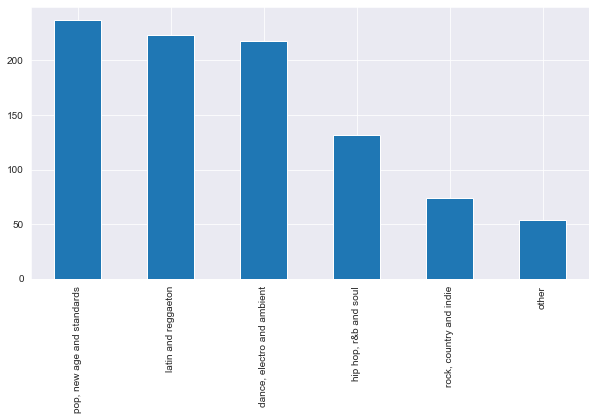

In [18]:
number_genres_new = data_ana_corona.genre_depurated_final.value_counts()
plt.figure(figsize=(10,5)) 
number_genres_new.plot.bar()
plt.show()

# Juntamos dataframes de extracción canciones + extracción features + géneros

In [19]:
# Juntar con dataframe inicial

data_mix = pd.merge(df_streamsongs, df_features, on=['spotify_id'], how='inner')
#data_mix.rename(columns = {'Artist': 'artist'}, inplace = True)
data_mix2 = pd.merge(data_mix, data_ana_corona, on=['Artist'], how='inner')
data_mix2 = data_mix2.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])

# Exportar a CSV
data_mix2.to_csv("data_allyear/data_ana_timeseries_final.csv", sep = ',')
data_mix2

,Track Name,Artist,streams_song_day,date,spotify_id,year,month,week,day,year_month,streams_month,streams_year,streams_day,name,artist,album,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,release_date_year,Unnamed: 0,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,10,genres_together,artist_id,artist_followers,artist_popularity,genre_depurated_final
0,Tusa,KAROL G,344475.0,2020-01-01,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,1,2020-01-01,472515212.0,6.399289e+09,11238605.0,Tusa,KAROL G,Tusa,2019-11-07,0.362231,0.905263,0.2950,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,4,2019-01-01,624,latin,reggaeton,reggaeton colombiano,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.90,latin and reggaeton
1,Tusa,KAROL G,436442.0,2020-01-02,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,2,2020-01-01,472515212.0,6.399289e+09,14874893.0,Tusa,KAROL G,Tusa,2019-11-07,0.362231,0.905263,0.2950,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,4,2019-01-01,624,latin,reggaeton,reggaeton colombiano,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.90,latin and reggaeton
2,Tusa,KAROL G,447837.0,2020-01-03,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,3,2020-01-01,472515212.0,6.399289e+09,15369224.0,Tusa,KAROL G,Tusa,2019-11-07,0.362231,0.905263,0.2950,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,4,2019-01-01,624,latin,reggaeton,reggaeton colombiano,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.90,latin and reggaeton
3,Tusa,KAROL G,442161.0,2020-01-04,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,4,2020-01-01,472515212.0,6.399289e+09,14592459.0,Tusa,KAROL G,Tusa,2019-11-07,0.362231,0.905263,0.2950,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,4,2019-01-01,624,latin,reggaeton,reggaeton colombiano,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.90,latin and reggaeton
4,Tusa,KAROL G,419754.0,2020-01-05,7k4t7uLgtOxPwTpFmtJNTY,2020,1,1,5,2020-01-01,472515212.0,6.399289e+09,13511143.0,Tusa,KAROL G,Tusa,2019-11-07,0.362231,0.905263,0.2950,0.803,0.715,0.000134,0.0574,0.871977,0.415621,0.574,0.476553,4,2019-01-01,624,latin,reggaeton,reggaeton colombiano,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"latin,reggaeton,reggaeton colombiano,trap latino",790FomKkXshlbRYZFtlgla,14621954,0.90,latin and reggaeton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285736,One More Sleep,Leona Lewis,26720.0,2017-12-24,78pn8k7RogKo2oxl0DyX6d,2017,12,51,24,2017-12-01,323234736.0,3.656169e+09,13012108.0,One More Sleep,Leona Lewis,"Christmas, With Love",2013-12-02,0.447901,0.726316,0.4640,0.638,0.813,0.000000,0.3440,0.854105,0.050488,0.754,0.532659,4,2013-01-01,64,british soul,dance pop,europop,pop,pop dance,post-teen pop,talent show,urban contemporary,NaN,NaN,NaN,"british soul,dance pop,europop,pop,pop dance,p...",5lKZWd6HiSCLfnDGrq9RAm,2622267,0.73,"hip hop, r&b and soul"
285737,One More Sleep,Leona Lewis,15876.0,2017-12-25,78pn8k7RogKo2oxl0DyX6d,2017,12,52,25,2017-12-01,323234736.0,3.656169e+09,8216323.0,One More Sleep,Leona Lewis,"Christmas, With Love",2013-12-02,0.447901,0.726316,0.4640,0.638,0.813,0.000000,0.3440,0.854105,0.050488,0.754,0.532659,4,2013-01-01,64,british soul,dance pop,europop,pop,pop dance,post-teen pop,talent show,urban contemporary,NaN,NaN,NaN,"british soul,dance pop,europop,pop,pop dance,p...",5lKZWd6HiSCLfnDGrq9RAm,2622267,0.73,"hip hop, r&b and soul"
285738,Ain't No Mountain High Enough,Marvin Gaye,31874.0,2017-12-31,2H3ZUSE54pST4ubRd5FzFR,2017,12,52,31,2017-12-01,323234736.0,3.656169e+09,13527896.

### Curiosidad ¿Cuántas artistas únicos y sus streams tenemos?

Echamos un vistazo a ver ¿Cuántos artistas únicos hay realmente? Y obtenemos una lista de los artistas que más veces han estado en el top200: en dicho periodo que seleccionamos inicialmente y en los cuatro años analizados. Vaya, parece que el "conejo malo" está a tope...

In [23]:
# Vuelvo a cargar todo
df_timeseries_final = pd.read_csv("data_allyear/data_ana_timeseries_final.csv", sep = ',', parse_dates=['date','year_month', 'release_date_year'])
df_timeseries_final.shape

(285741, 48)

In [22]:
# Los artistas que salen mñas veces en el top200
artist_unique = df_timeseries_final.groupby('Artist')['spotify_id'].nunique()
print(artist_unique.shape)
artist_unique.sort_values(ascending=False).head(20)

(880,)


Artist
Bad Bunny          82
Ozuna              82
Aitana             62
Ariana Grande      55
C. Tangana         54
J Balvin           52
Pablo Alborán      49
Rels B             48
Drake              44
Anuel AA           42
Ed Sheeran         41
Beret              41
Taylor Swift       36
Melendi            36
Rauw Alejandro     32
Maluma             32
Natalia Lacunza    31
Imagine Dragons    31
Natos y Waor       30
Alfred García      29
Name: spotify_id, dtype: int64

Si hacemos lo mismo con los StreamsTotal, vemos que la lista no es igual, pero Bad Bunny se mantiene y con muchos más streams. Recordamos que esto es para los años 2017-2020, juntos.

In [26]:
# Los artistas con más reproducciones en total
artist_streams = df_timeseries_final.groupby('Artist')['streams_song_day'].sum()
print(artist_streams.shape)
artist_streams.sort_values(ascending=False).head(20)

(880,)


Artist
Bad Bunny          807051846.0
Ozuna              710643930.0
J Balvin           621280182.0
Anuel AA           561214401.0
C. Tangana         370004144.0
Maluma             368298173.0
Aitana             356674979.0
ROSALÍA            328572242.0
Daddy Yankee       310220140.0
KAROL G            306239589.0
Beret              287403462.0
Rauw Alejandro     286413494.0
Sech               280452081.0
Luis Fonsi         275406313.0
Nicky Jam          269983652.0
Sebastian Yatra    251677996.0
Ed Sheeran         249069361.0
Becky G            234449221.0
Morat              232103317.0
Myke Towers        207939322.0
Name: streams_song_day, dtype: float64

# Primer vistazo a los datos


## Correlaciones

Analizamos las correlaciones y parece que tienen lógica- Oor ejemplo las features Energy y Loudness tienen una correlación alta: generalmente canciones muy enérgicas suelen ser también ruidosas.

In [27]:
#Para ver si existen variables con corelación entre ellas.
corr_metrics = df_timeseries_final.corr()
corr_metrics.style.background_gradient()

,Unnamed: 0,streams_song_day,year,month,week,day,streams_month,streams_year,streams_day,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,time_signature,Unnamed: 0.1,artist_followers,artist_popularity
Unnamed: 0,1.000000,-0.241077,-0.369049,-0.064334,-0.063776,-0.000381,-0.354597,-0.370475,-0.328916,-0.023936,-0.107324,-0.140352,-0.060798,0.075943,0.017322,0.040839,-0.020116,-0.093246,-0.039107,-0.099358,-0.003551,-0.028203,-0.199861,-0.415566
streams_song_day,-0.241077,1.000000,0.210149,0.053657,0.053489,0.009275,0.223735,0.210769,0.241570,-0.001217,0.150243,0.001405,0.150988,0.053054,-0.026886,-0.027128,0.119439,0.077830,0.109357,-0.003080,0.018300,0.028392,0.010240,0.117817
year,-0.369049,0.210149,1.000000,-0.009498,-0.000708,-0.003302,0.920960,0.995787,0.870862,-0.106982,0.465881,0.070489,0.104377,-0.073432,0.016231,-0.024517,0.029135,0.116744,0.073810,0.058641,0.013648,0.020393,-0.115432,0.013757
month,-0.064334,0.053657,-0.009498,1.000000,0.981337,0.005866,0.248877,-0.008976,0.224986,-0.027308,0.109091,0.022910,0.015634,-0.018676,-0.027307,-0.016478,-0.000689,0.037557,0.015504,-0.009978,-0.006778,0.005180,-0.044074,0.002732
week,-0.063776,0.053489,-0.000708,0.981337,1.000000,0.072706,0.252367,-0.001273,0.224366,-0.028245,0.111808,0.022755,0.015548,-0.018509,-0.026838,-0.016134,-0.000396,0.037215,0.016088,-0.009308,-0.006579,0.005464,-0.045221,0.002196
day,-0.000381,0.009275,-0.003302,0.005866,0.072706,1.000000,0.004196,-0.003049,0.038217,-0.005791,0.009223,0.002106,0.000819,-0.004169,0.004590,0.000469,-0.003437,0.002059,0.001637,0.000168,0.000336,0.000380,-0.003895,-0.001903
streams_month,-0.354597,0.223735,0.920960,0.248877,0.252367,0.004196,1.000000,0.925032,0.926473,-0.105564,0.472453,0.073552,0.112965,-0.071395,0.003551,-0.021043,0.031490,0.126658,0.074144,0.051455,0.009407,0.018055,-0.112168,0.015579
streams_year,-0.370475,0.210769,0.995787,-0.008976,-0.001273,-0.003049,0.925032,1.000000,0.873297,-0.108246,0.465343,0.075405,0.105851,-0.078628,0.015088,-0.023137,0.026489,0.122786,0.068889,0.057867,0.011050,0.017078,-0.114938,0.010461
streams_day,-0.328916,0.241570,0.870862,0.224986,0.224366,0.038217,0.926473,0.873297,1.000000,-0.100568,0.444283,0.067904,0.102996,-0.066591,0.005118,-0.018978,0.029400,0.115643,0.071199,0.050440,0.008562,0.015241,-0.105429,0.015075
length,-0.023936,-0.001217,-0.106982,-0.027308,-0.028245,-0.005791,-0.105564,-0.108246,-0.100568,1.000000,-0.014012,0.005411,-0.047949,0.038529,-0.034013,-0.008076,0.019787,-0.011585,-0.074562,0.046481,0.003122,0.000138,0.054797,0.064315


In [28]:
# Ver correlación concreta entre loudness y energy
data_glo2 = df_timeseries_final.loc[:, ['loudness', 'energy']]
corr_metrics2 = data_glo2.corr()
corr_metrics2.style.background_gradient()

,loudness,energy
loudness,1.000000,0.714046
energy,0.714046,1.000000


## Comparar FEATURES de cada año (sin ponderar)

Ploteamos en gráfico para ver la cantidad de canciones con los valores de determinadas features

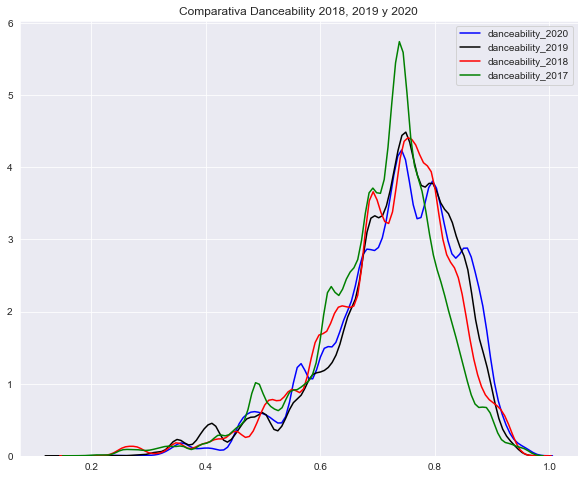

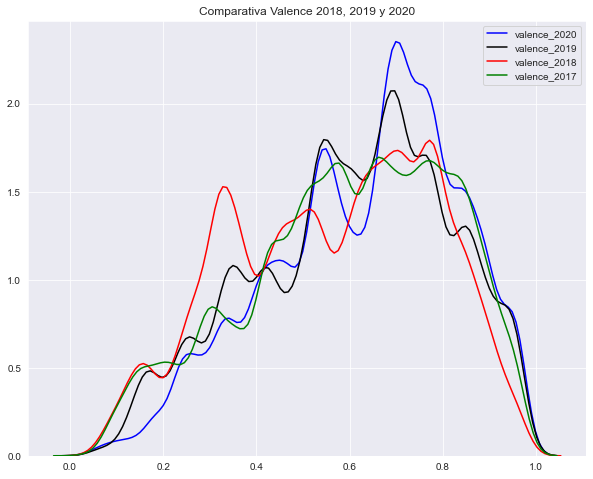

In [29]:
data_glo_2020 = df_timeseries_final[df_timeseries_final['year'] == 2020]
data_glo_2019 = df_timeseries_final[df_timeseries_final['year'] == 2019]
data_glo_2018 = df_timeseries_final[df_timeseries_final['year'] == 2018]
data_glo_2017 = df_timeseries_final[df_timeseries_final['year'] == 2017]

feature_list = ['length','popularity', 'acousticness', 'danceability','energy', 'instrumentalness', 'liveness',
                'loudness', 'speechiness', 'valence', 'tempo']

features_2020 = data_glo_2020[feature_list]
features_2019 = data_glo_2019[feature_list]
features_2018 = data_glo_2018[feature_list]
features_2017 = data_glo_2017[feature_list]

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Comparativa Danceability 2018, 2019 y 2020')
sns.kdeplot(features_2020['danceability'], ax=ax1, color = 'blue', Label='danceability_2020')
sns.kdeplot(features_2019['danceability'], ax=ax1, color = 'black', Label='danceability_2019')
sns.kdeplot(features_2018['danceability'], ax=ax1, color = 'red', Label='danceability_2018')
sns.kdeplot(features_2017['danceability'], ax=ax1, color = 'green', Label='danceability_2017')

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Comparativa Valence 2018, 2019 y 2020')
sns.kdeplot(features_2020['valence'], ax=ax1, color = 'blue', Label='valence_2020')
sns.kdeplot(features_2019['valence'], ax=ax1, color = 'black', Label='valence_2019')
sns.kdeplot(features_2018['valence'], ax=ax1, color = 'red', Label='valence_2018')
sns.kdeplot(features_2017['valence'], ax=ax1, color = 'green', Label='valence_2017')